In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, precision_score, mean_absolute_error, r2_score, ConfusionMatrixDisplay,confusion_matrix, recall_score


In [63]:
df = pd.read_csv("wine data.csv")
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9.8        5   2  
3      9.8        6   3  
4      9.4        5   4

In [64]:
!pip install lightgbm

In [65]:
import lightgbm as lgb

In [66]:
print(f'Dataset has {len(df.columns)} and {len(df.index)} entries')


Dataset has 13 and 1143 entries


In [67]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

In [68]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [69]:
for column in df.columns:
    print(f"Type of {column}: {type(df[column][0])}")

Type of fixed acidity: <class 'numpy.float64'>
Type of volatile acidity: <class 'numpy.float64'>
Type of citric acid: <class 'numpy.float64'>
Type of residual sugar: <class 'numpy.float64'>
Type of chlorides: <class 'numpy.float64'>
Type of free sulfur dioxide: <class 'numpy.float64'>
Type of total sulfur dioxide: <class 'numpy.float64'>
Type of density: <class 'numpy.float64'>
Type of pH: <class 'numpy.float64'>
Type of sulphates: <class 'numpy.float64'>
Type of alcohol: <class 'numpy.float64'>
Type of quality: <class 'numpy.int64'>
Type of Id: <class 'numpy.int64'>


In [70]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1143.000000       1143.000000  1143.000000     1143.000000   
mean        8.311111          0.531339     0.268364        2.532152   
std         1.747595          0.179633     0.196686        1.355917   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.392500     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.100000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1143.000000          1143.000000           1143.000000  1143.000000   
mean      0.086933            15.615486             45.914698     0.996730   
std       0.047267            10.250486             32.782130     0.001925   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             21.000000     0.995570   
50%       0.079000            13.000000             37.000000     0.996680   
75%       0.090000            21.000000             61.000000     0.997845   
max       0.611000            68.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality           Id  
count  1143.000000  1143.000000  1143.000000  1143.000000  1143.000000  
mean      3.311015     0.657708    10.442111     5.657043   804.969379  
std       0.156664     0.170399     1.082196     0.805824   463.997116  
min       2.740000     0.330000     8.400000     3.000000     0.000000  
25%       3.205000     0.550000     9.500000     5.000000   411.000000  
50%       3.310000     0.620000    10.200000     6.000000   794.000000  
75%       3.400000     0.730000    11.100000     6.000000  1209.500000  
max       4.010000     2.000000    14.900000     8.000000  1597.000000

In [71]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

count
quality       
3            6
4           33
5          483
6          462
7          143
8           16

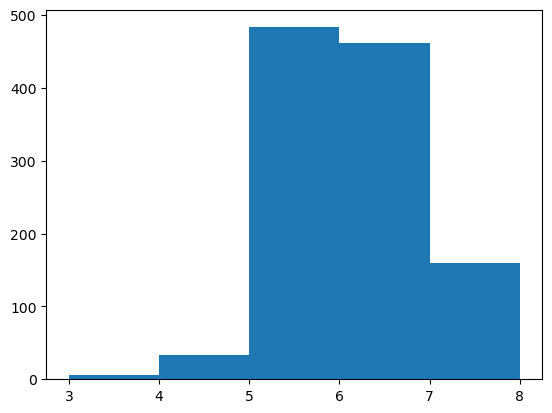

In [72]:
import matplotlib.pyplot as plt
plt.hist(df["quality"], bins=5)
display(df.groupby("quality").agg(count=("quality", "count"))) 

In [73]:
quality_label = {3:"low", 4:"low",5:"mid", 6: "mid", 7:"high", 8:"high"}
df.loc[:, "quality_label"] = df.quality.map(quality_label)
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id quality_label  
0      9.4        5   0           mid  
1      9.8        5   1           mid  
2      9.8        5   2           mid  
3      9.8        6   3           mid  
4      9.4        5   4           mid

In [74]:
from sklearn.preprocessing import LabelEncoder
quality_encoder = LabelEncoder()
quality_encoder.fit(df["quality"].unique())
df.loc[:, "quality_encoded"] = quality_encoder.transform(df["quality"])
quality_encoder.classes_

array([3, 4, 5, 6, 7, 8], dtype=int64)

C:\Users\Anjali kushwaha\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


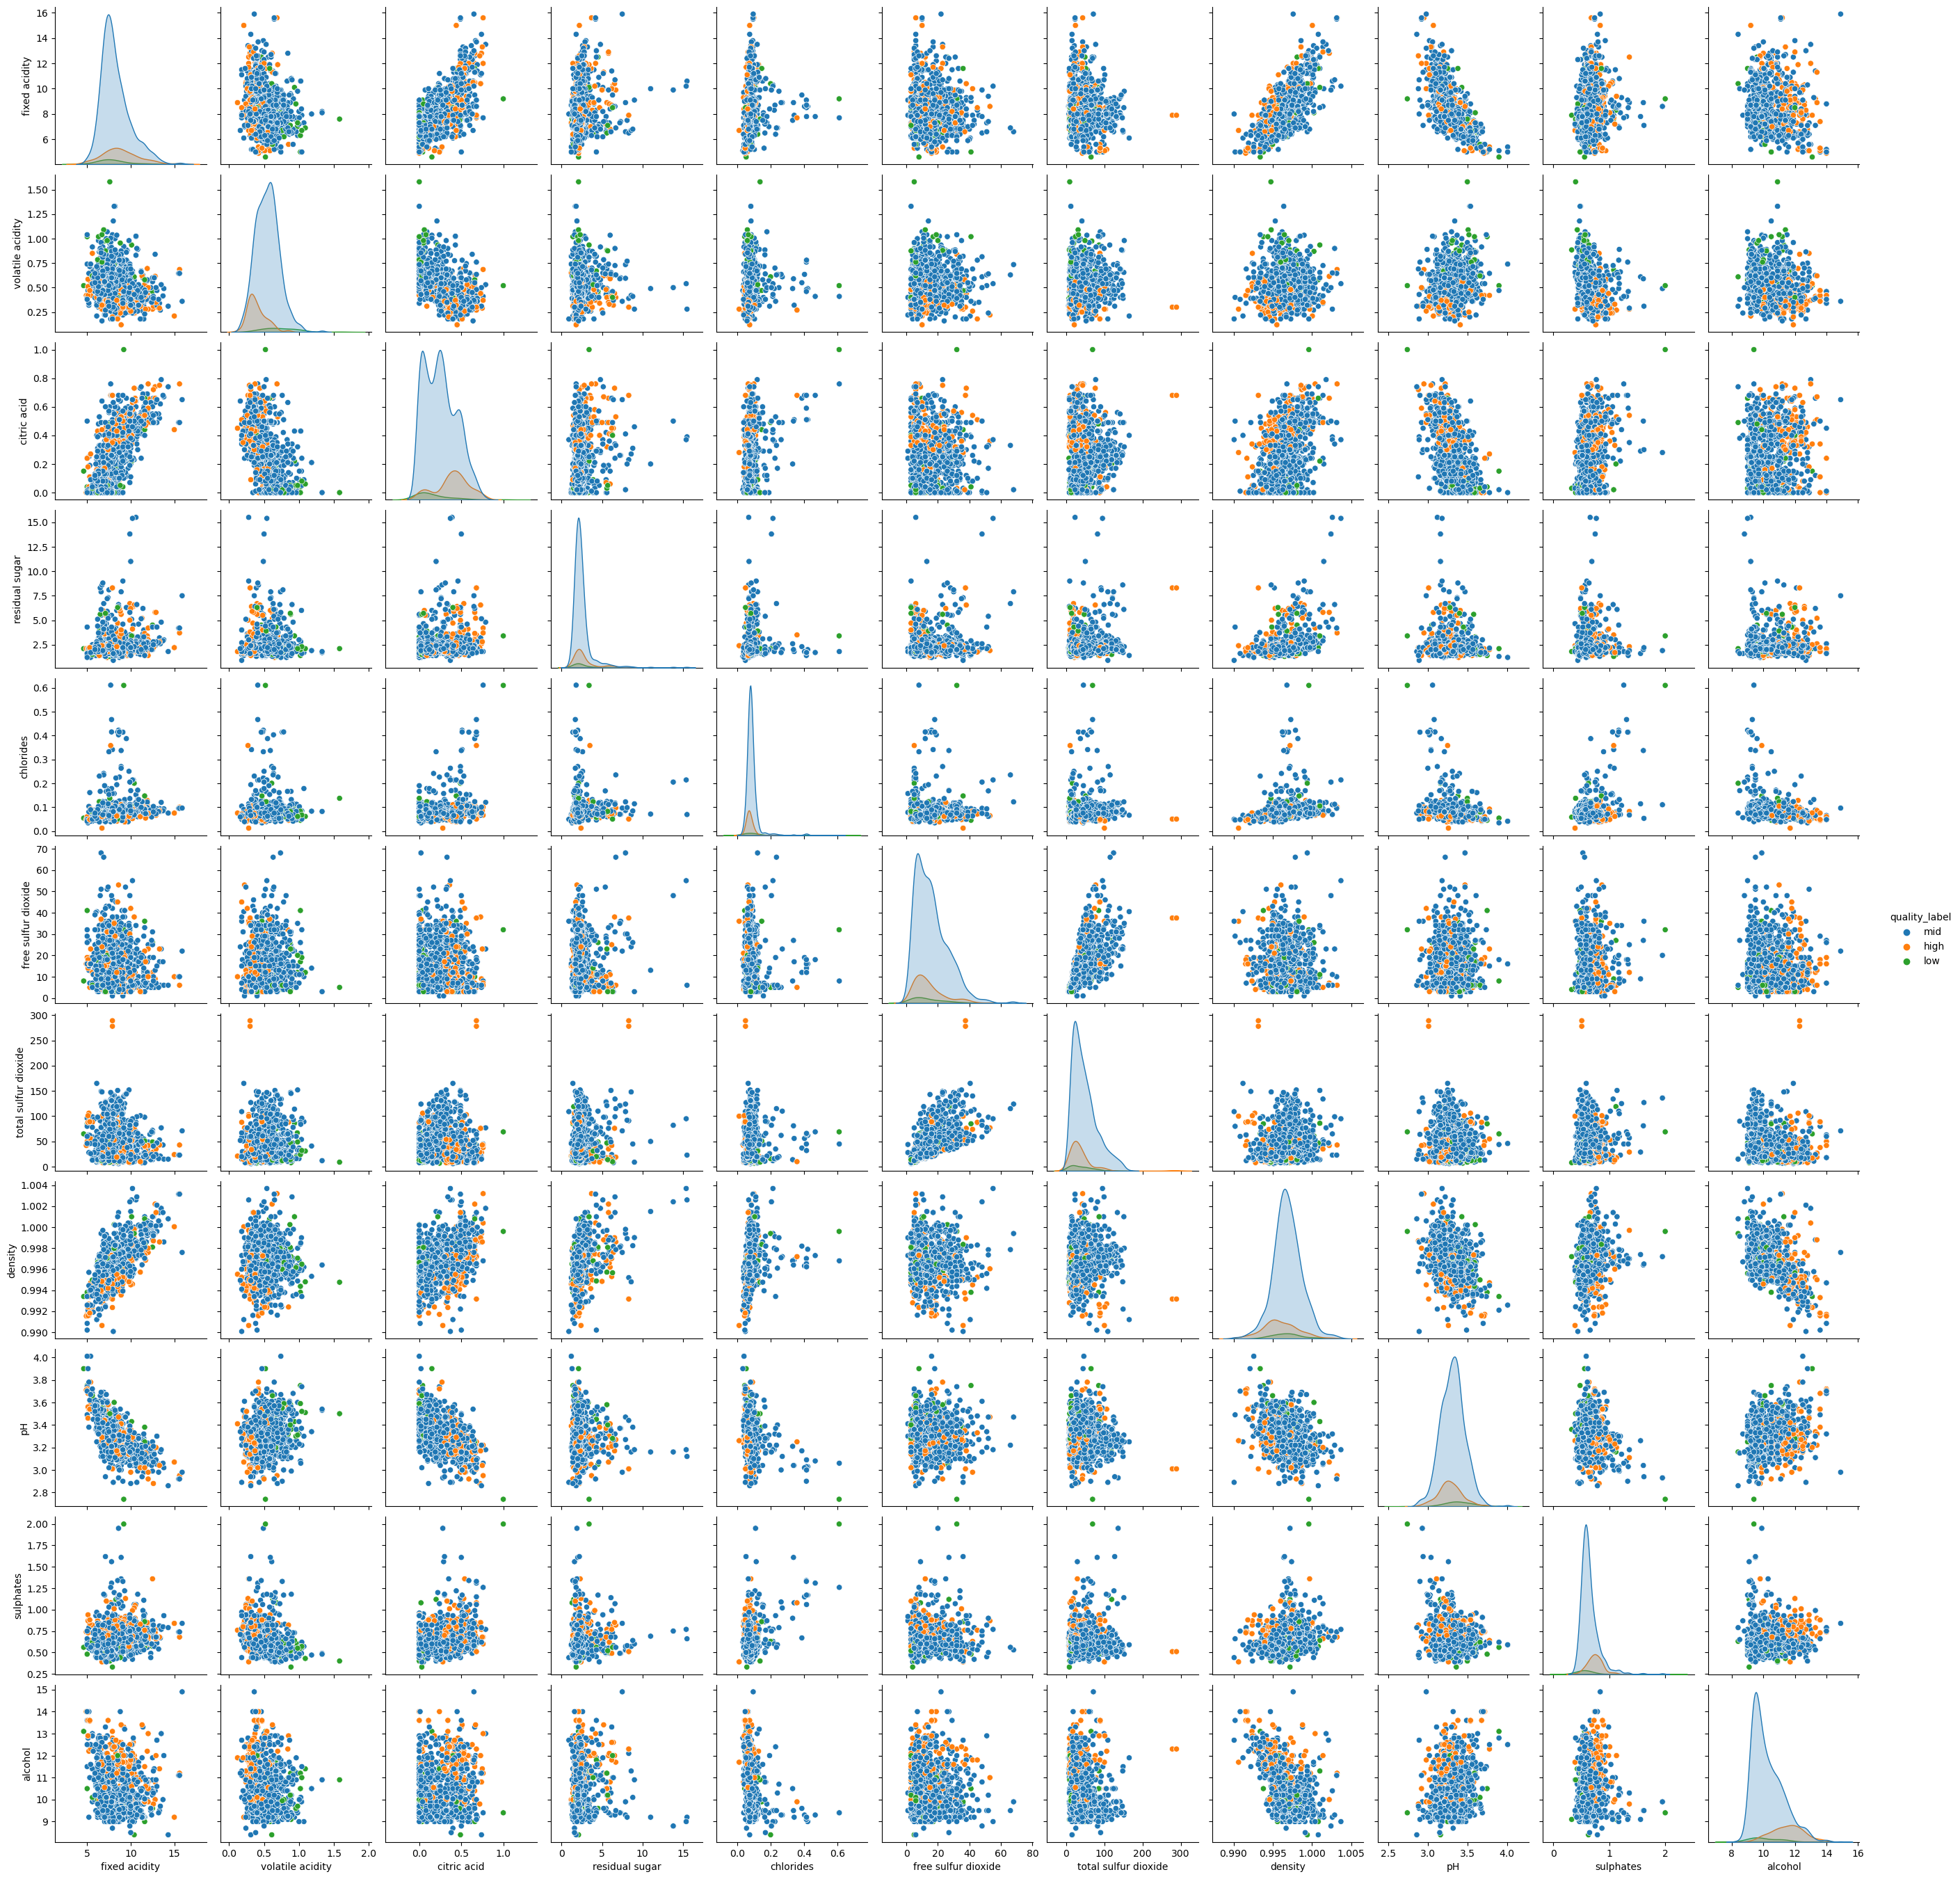

In [75]:
import seaborn as sn 
sn.pairplot(df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', "quality_label"]], hue="quality_label")

<Axes: xlabel='sulphates', ylabel='alcohol'>

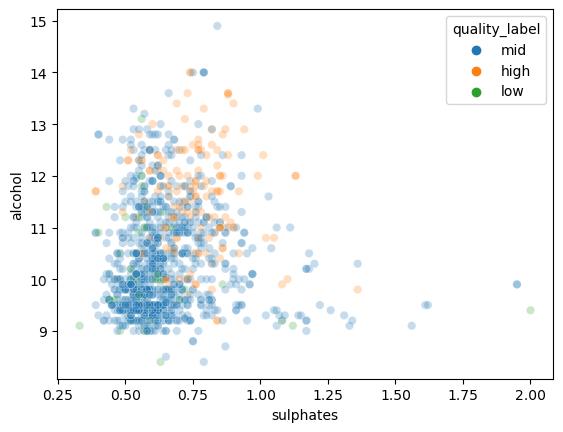

In [76]:
sn.scatterplot(data=df, x="sulphates", y="alcohol",hue="quality_label",alpha=0.25)

<Axes: xlabel='volatile acidity', ylabel='residual sugar'>

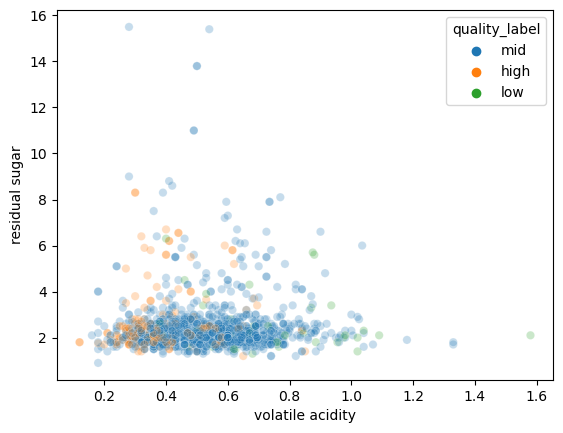

In [77]:
sn.scatterplot(data=df, x="volatile acidity", y="residual sugar",hue="quality_label",alpha=0.25)

In [78]:
df.shape

(1143, 15)

In [79]:
traget_cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']
y_col = "quality"
y_dl_col = "quality_encoded"

In [80]:
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.metrics import mean_absolute_error, accuracy_score, precision_score, r2_score # if the problem is to classify wine quality so your resturant gains competitive advantage on a purchase of next coming wine
# prepare dataset 
X_train, X_test, y_train, y_test = train_test_split(
    df[traget_cols], df[y_col], test_size=0.25, random_state=42)
# create validation dataset 
X_train_train, X_valid_train, y_train_train, y_valid_train = train_test_split(
    X_train[traget_cols], y_train, test_size=0.2, random_state=42)
X_train.shape

(857, 11)

In [81]:
ml_model = RandomForestRegressor()
ml_model.fit(X_train_train, y_train_train)
ml_predict = ml_model.predict(X_valid_train)

In [82]:
# prepare the model
model = keras.Sequential([layers.Dense(16,input_shape=[11]), 
                          layers.Activation("relu"),
                          layers.Dense(16, activation="relu"),
                          layers.Dense(1)])
model.compile(loss="mae", optimizer="adam")
hist = model.fit(X_train_train, y_train_train, batch_size=150, epochs=150, verbose=0)
dl_predict = model.predict(X_valid_train)

C:\Users\Anjali kushwaha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


In [83]:
checks = pd.DataFrame({"predict": dl_predict.reshape([1, len(y_valid_train)])[0], "true": y_valid_train.values})

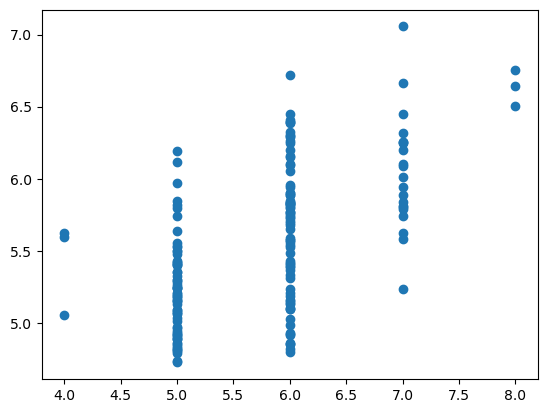

In [84]:
plt.scatter(x=checks["true"], y=checks["predict"])

<Axes: >

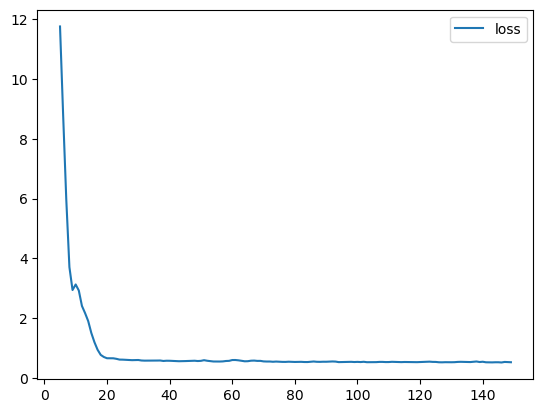

In [85]:
history_df = pd.DataFrame(hist.history)
# Start the plot at epoch 5. You can change this to get a different view.
history_df.loc[5:, ['loss']].plot()

In [86]:
print("Deep Learning Model Score:",mean_absolute_error(y_valid_train, dl_predict))
print("Deep Learning Model R2:",r2_score(y_valid_train, dl_predict))

print("RandomForest Model Accuracy:", mean_absolute_error(y_valid_train, ml_predict))
print("RandomForest Model r2_score:", r2_score(y_valid_train, ml_predict))

Deep Learning Model Score: 0.5050364510957585
Deep Learning Model R2: 0.2744217074825033
RandomForest Model Accuracy: 0.4361046511627906
RandomForest Model r2_score: 0.4586222766503383


In [87]:
result_df = pd.DataFrame({"ml_pred":ml_predict,"dl_pred": dl_predict.reshape(1, len(dl_predict))[0], "true":y_valid_train})
result_df.loc[:, "result"] = result_df.apply(lambda data: data["dl_pred"] == data["true"], axis=1) 

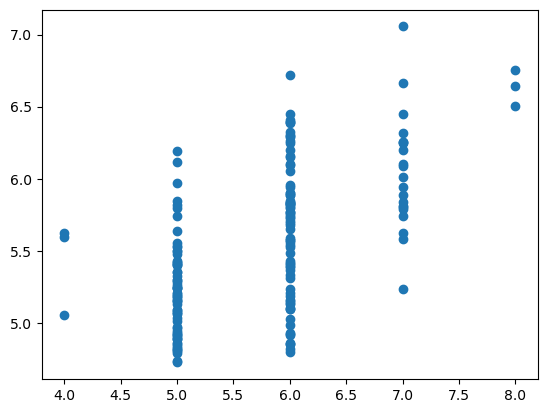

In [88]:
plt.scatter(x=result_df["true"], y=result_df["dl_pred"])

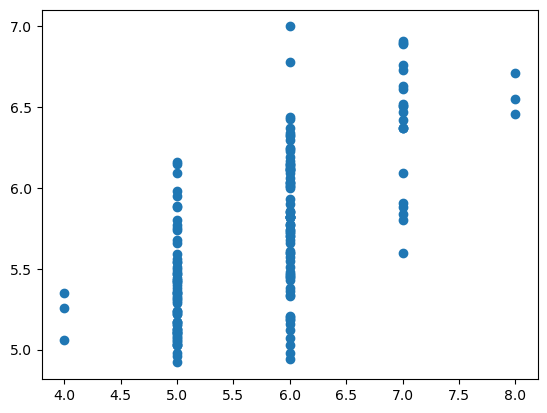

In [89]:
plt.scatter(x=result_df["true"], y=result_df["ml_pred"])

C:\Users\Anjali kushwaha\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


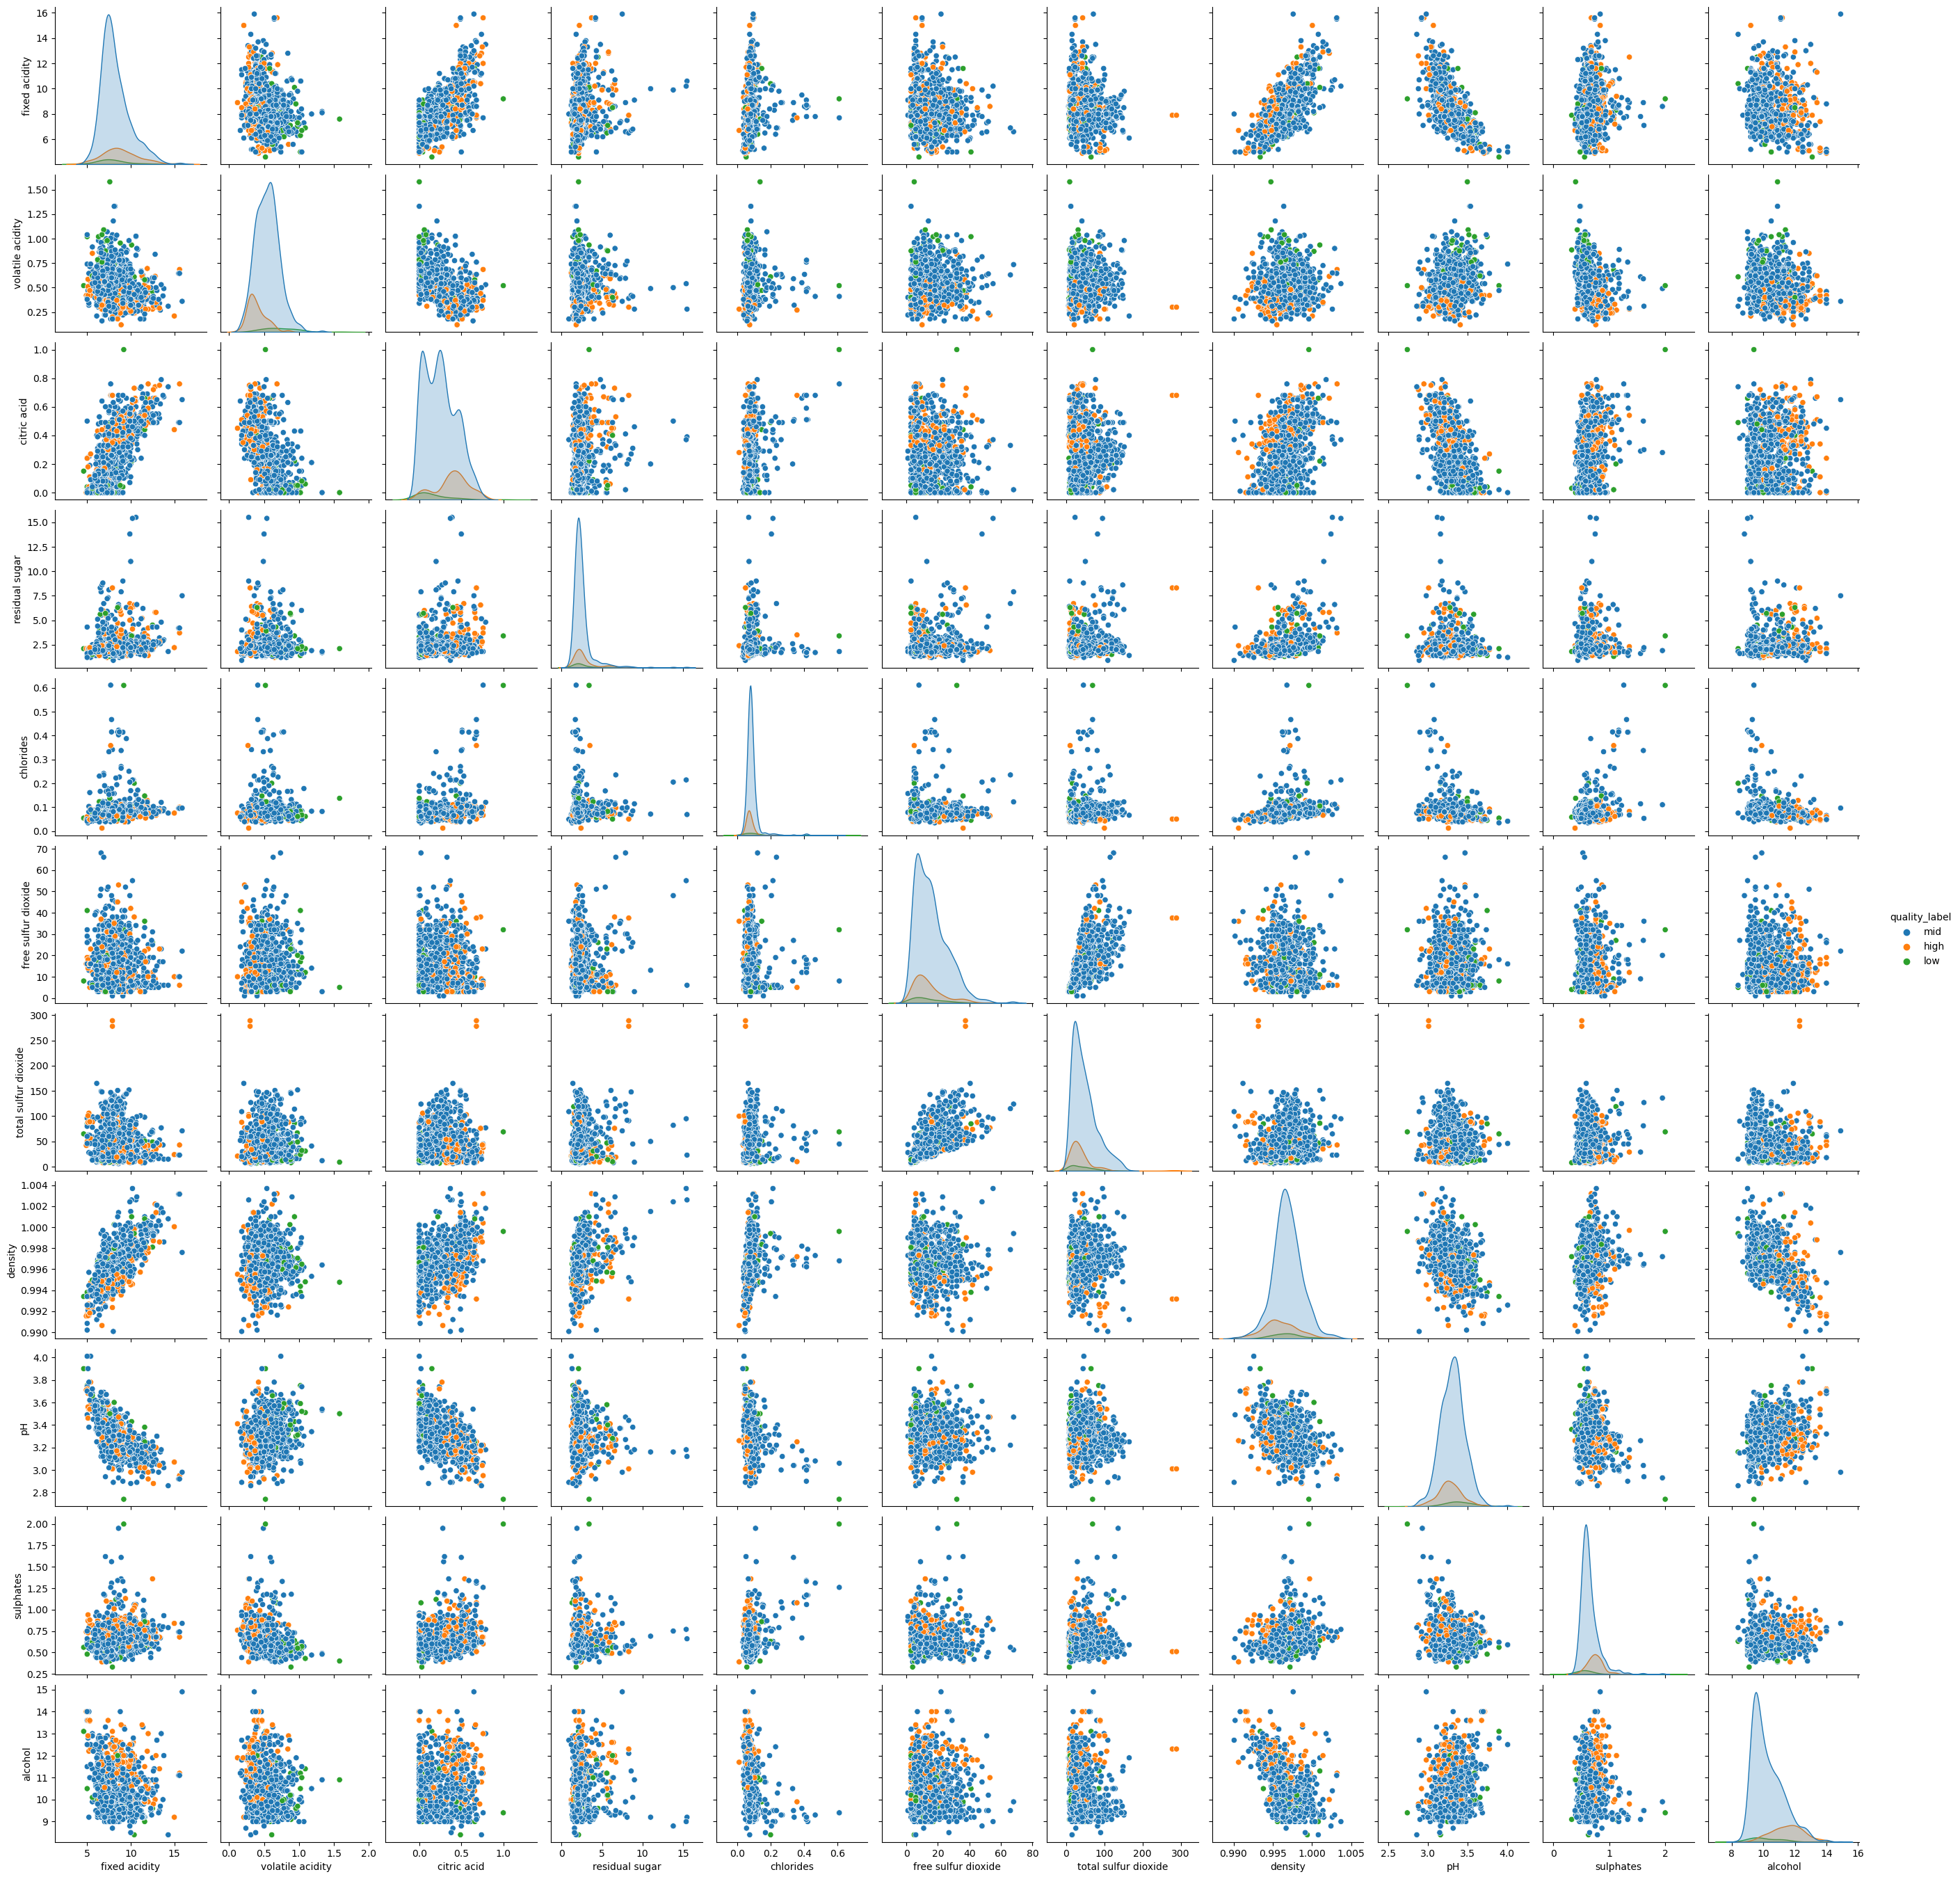

In [90]:
sn.pairplot(df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', "quality_label"]], hue="quality_label")

In [92]:
potential_features = df.columns
potential_features = potential_features.drop("Id")
potential_features = potential_features.drop("quality")

<Axes: xlabel='citric acid', ylabel='fixed acidity'>

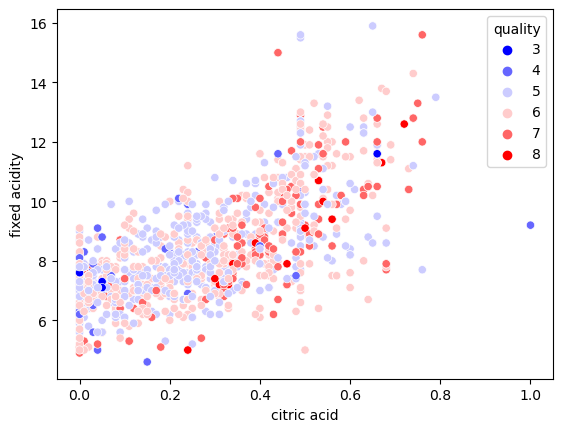

In [94]:
sn.scatterplot(data=df, x="citric acid",y="fixed acidity",hue="quality", palette="bwr")

<Axes: xlabel='citric acid', ylabel='fixed acidity'>

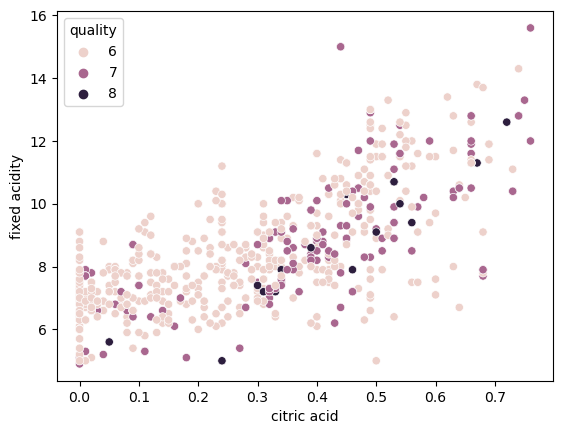

In [95]:
sn.scatterplot(data=df.loc[df["quality"] > 5], x="citric acid",y="fixed acidity",hue="quality")

<Axes: xlabel='density', ylabel='alcohol'>

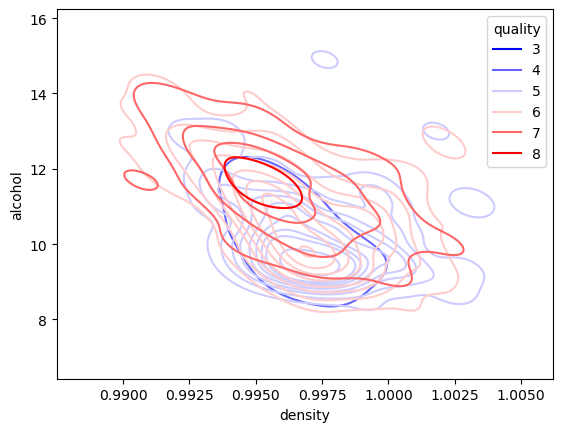

In [96]:
sn.kdeplot(data=df, x="density",y="alcohol",hue="quality",palette="bwr")

<Axes: xlabel='volatile acidity', ylabel='Density'>

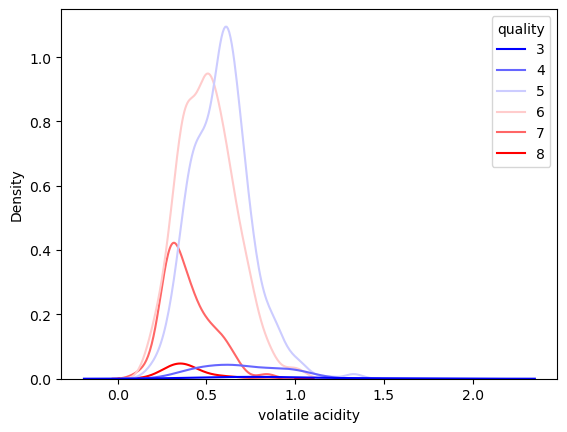

In [97]:
sn.kdeplot(data=df, x="volatile acidity", hue="quality",palette="bwr")

<Axes: xlabel='total sulfur dioxide', ylabel='Density'>

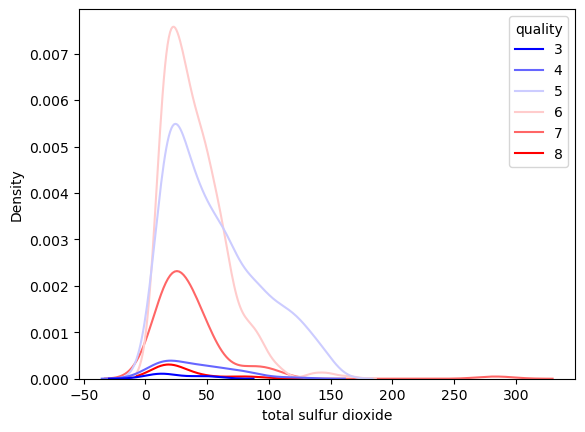

In [98]:
sn.kdeplot(data=df, x="total sulfur dioxide", hue="quality",palette="bwr")

<Axes: xlabel='sulphates', ylabel='residual sugar'>

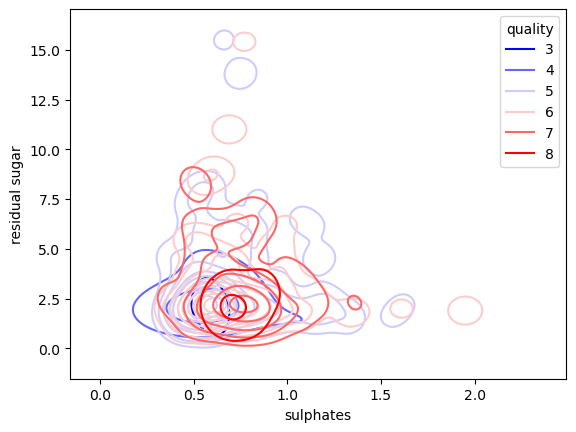

In [99]:
sn.kdeplot(data=df, x="sulphates", y="residual sugar",hue="quality",palette="bwr")

<Axes: xlabel='residual sugar', ylabel='Density'>

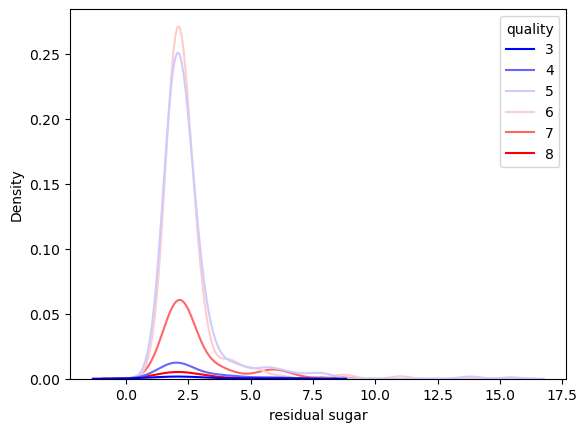

In [100]:
sn.kdeplot(data=df, x="residual sugar",hue="quality",palette="bwr")

<Axes: xlabel='sulphates_sugar_ratio', ylabel='Density'>

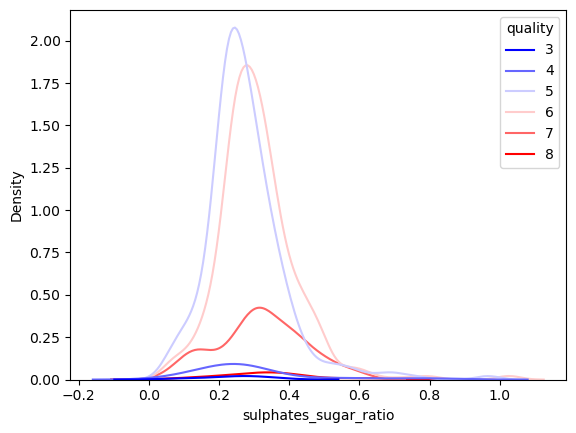

In [101]:
df.loc[:, "sulphates_sugar_ratio"] = df["sulphates"]/df["residual sugar"]
sn.kdeplot(data=df, x="sulphates_sugar_ratio", hue="quality",palette="bwr")

<Axes: xlabel='total sulfur dioxide', ylabel='free sulfur dioxide'>

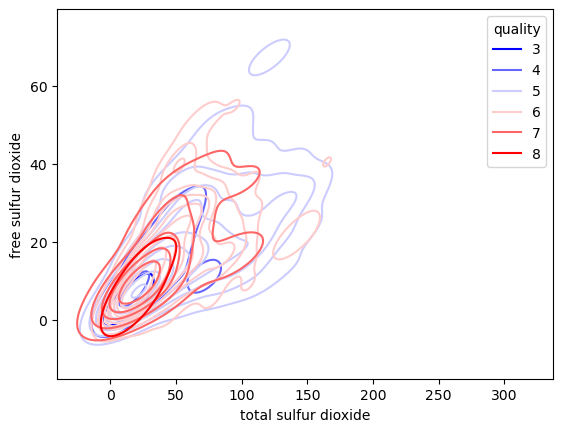

In [102]:
sn.kdeplot(data=df, x="total sulfur dioxide", y="free sulfur dioxide",hue="quality",palette="bwr")

<Axes: xlabel='free_sulfur_dioxide_ratio', ylabel='Density'>

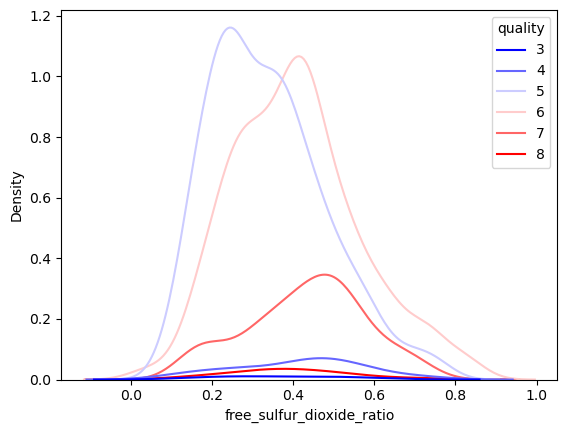

In [103]:
df.loc[:, "free_sulfur_dioxide_ratio"] = df["free sulfur dioxide"] / df["total sulfur dioxide"]
sn.kdeplot(data=df, x="free_sulfur_dioxide_ratio",hue="quality",palette="bwr")

<Axes: xlabel='non_free_sulfur_dioxide', ylabel='Density'>

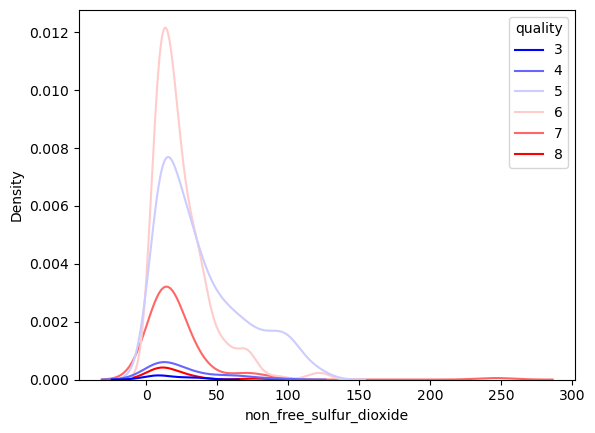

In [104]:
df.loc[:, "non_free_sulfur_dioxide"] =  df["total sulfur dioxide"]-df["free sulfur dioxide"]

sn.kdeplot(data=df, x="non_free_sulfur_dioxide",hue="quality",palette="bwr")


<Axes: xlabel='free_sulfur_dioxide_ratio', ylabel='alcohol'>

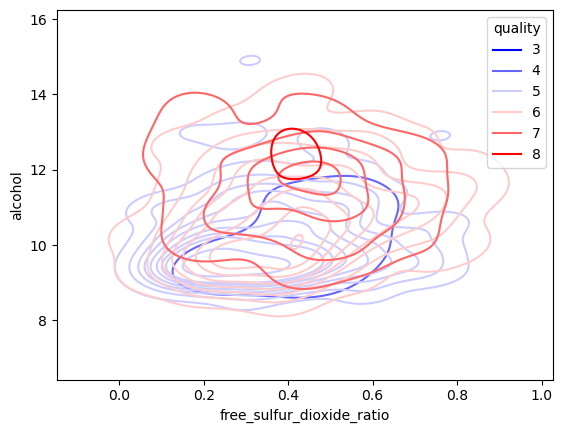

In [105]:
sn.kdeplot(data=df, x="free_sulfur_dioxide_ratio",y="alcohol",hue="quality",palette="bwr")

<Axes: xlabel='total sulfur dioxide', ylabel='Density'>

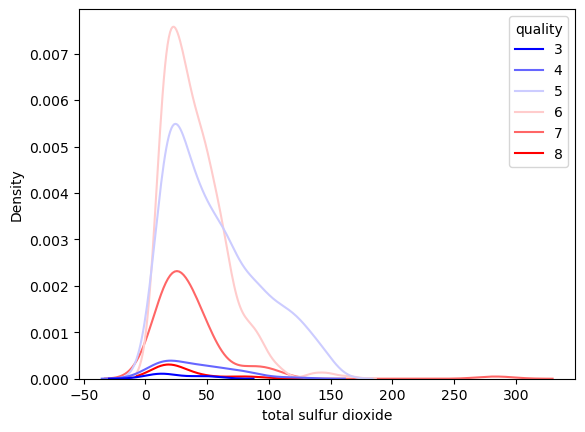

In [106]:
sn.kdeplot(data=df, x="total sulfur dioxide",hue="quality",palette="bwr")

<Axes: xlabel='residual sugar', ylabel='pH'>

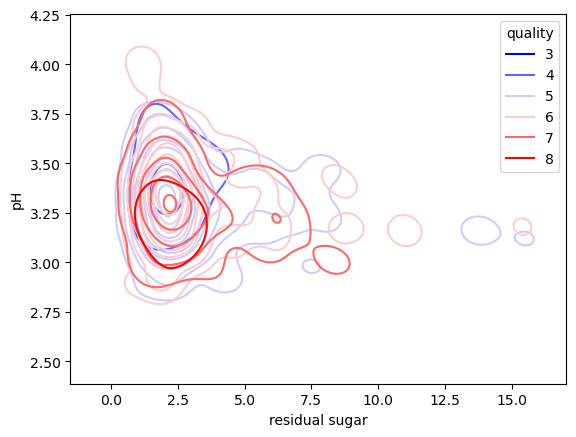

In [107]:
sn.kdeplot(data=df, x="residual sugar", y="pH",hue="quality",palette="bwr")

<Axes: xlabel='citric acid', ylabel='fixed acidity'>

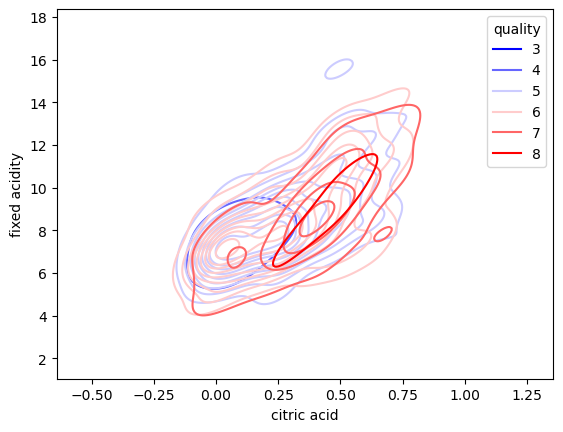

In [108]:
sn.kdeplot(data=df, x="citric acid", y="fixed acidity",hue="quality",palette="bwr")

<Axes: xlabel='citric_fixed_acidity_ratio', ylabel='Density'>

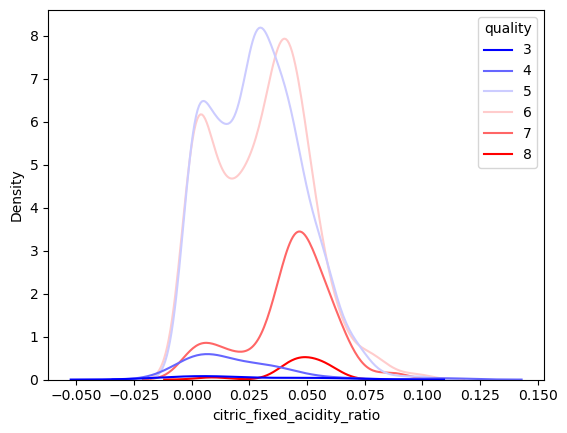

In [109]:
df.loc[:, "citric_fixed_acidity_ratio"] = df["citric acid"] / df["fixed acidity"]
sn.kdeplot(data=df, x="citric_fixed_acidity_ratio", hue="quality",palette="bwr")

<Axes: xlabel='citric_acid_ratio', ylabel='Density'>

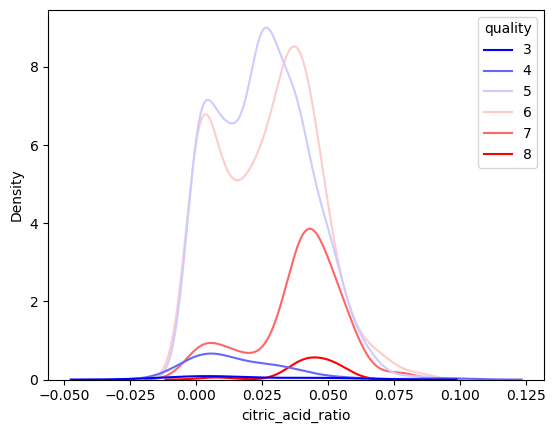

In [110]:
df.loc[:, "total_acid"] = df["volatile acidity"] + df["citric acid"] + df["fixed acidity"]

df.loc[:, "citric_acid_ratio"] = df["citric acid"] / df["total_acid"]
df.loc[:, "fixed_acidity_ratio"] = df["fixed acidity"] / df["total_acid"]
df.loc[:, "volatitlity_acidity_ratio"] = df["volatile acidity"] / df["total_acid"]
sn.kdeplot(data=df, x="citric_acid_ratio", hue="quality",palette="bwr")


<Axes: xlabel='volatitlity_acidity_ratio', ylabel='Density'>

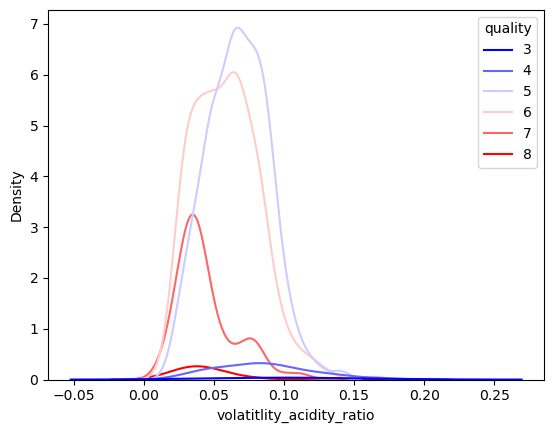

In [111]:
sn.kdeplot(data=df, x="volatitlity_acidity_ratio", hue="quality",palette="bwr")

<Axes: xlabel='good_acidity_ratio', ylabel='Density'>

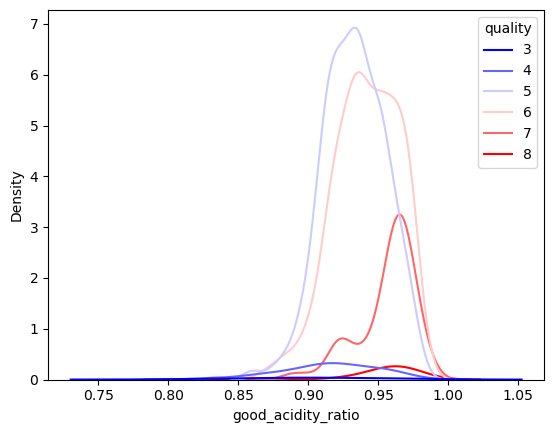

In [112]:
df.loc[:, "good_acidity_ratio"] =  (df["citric acid"] + df["fixed acidity"])/df["total_acid"] 
sn.kdeplot(data=df, x="good_acidity_ratio", hue="quality",palette="bwr")


<Axes: xlabel='alcohol', ylabel='citric acid'>

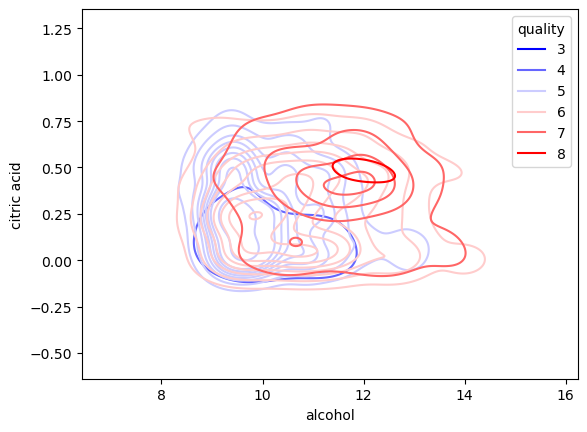

In [113]:
sn.kdeplot(data=df, x="alcohol",y="citric acid",hue="quality",palette="bwr")

<Axes: xlabel='sulphates', ylabel='Density'>

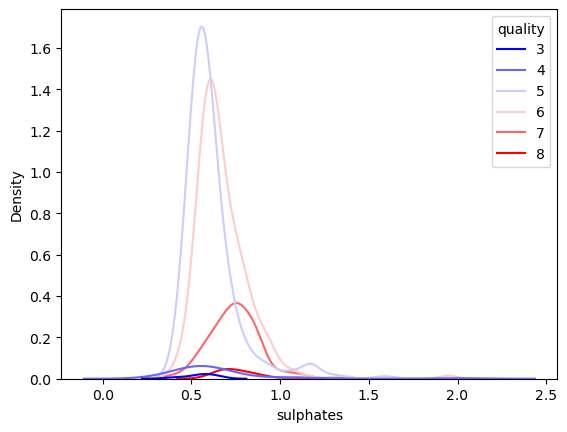

In [114]:
sn.kdeplot(data=df, x="sulphates", hue="quality",palette="bwr") 

<Axes: xlabel='citric_fixed_acid', ylabel='Density'>

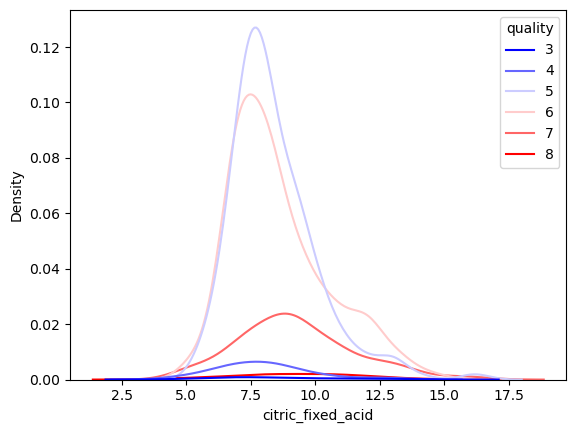

In [115]:
df.loc[:, "citric_fixed_acid"] = df["citric acid"] + df["fixed acidity"]
sn.kdeplot(data=df, x="citric_fixed_acid",hue="quality",palette="bwr")

<Axes: xlabel='total_acid', ylabel='alcohol'>

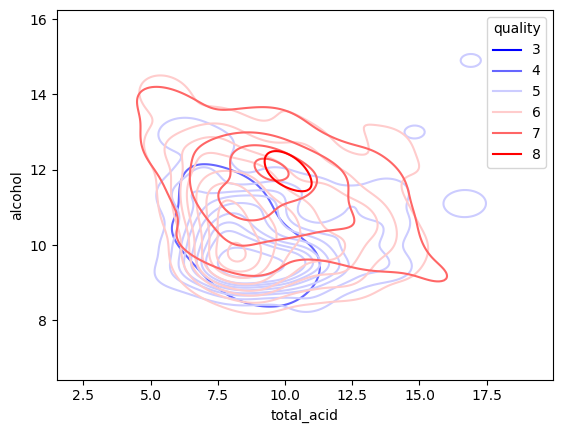

In [116]:
sn.kdeplot(data=df, x="total_acid", y="alcohol",hue="quality",palette="bwr")

<Axes: xlabel='total_acid_alcohol_ratio', ylabel='Density'>

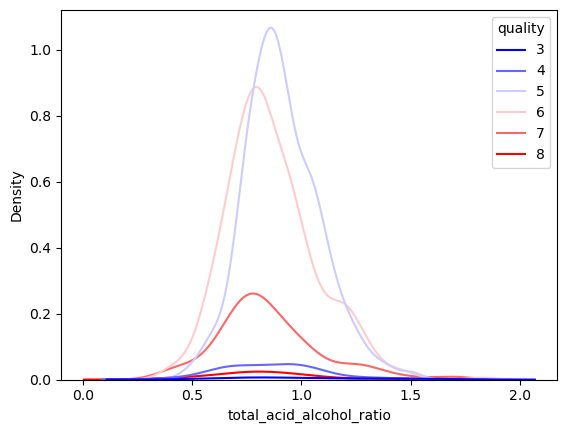

In [117]:
df.loc[:, "total_acid_alcohol_ratio"] = df["total_acid"] / df["alcohol"]
sn.kdeplot(data=df, x="total_acid_alcohol_ratio",hue="quality",palette="bwr")


<Axes: xlabel='alcohol', ylabel='Density'>

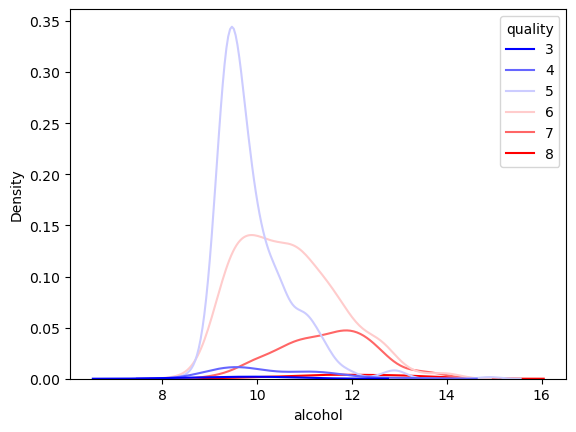

In [118]:
sns.kdeplot(data=df, x="alcohol",hue="quality",palette="bwr")

<Axes: xlabel='good_acidity_alchol_containment', ylabel='Density'>

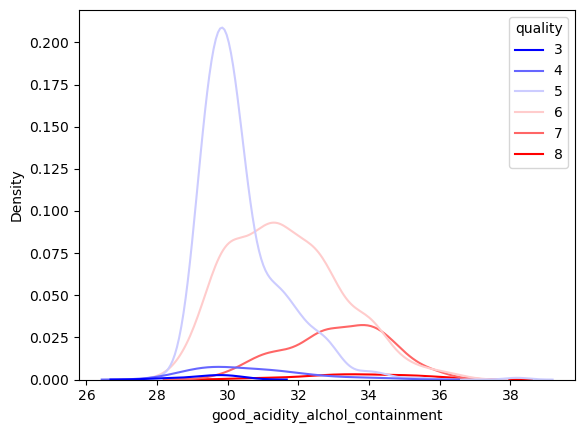

In [119]:
df.loc[:, "good_acidity_alchol_containment"] = np.sqrt((df["good_acidity_ratio"]*100) * df["alcohol"]) # by multipling 100, standardize unit <= 酸味とアルコールの 
sns.kdeplot(data=df, x="good_acidity_alchol_containment", hue="quality",palette="bwr")

In [120]:
"some articles explaining wine jargons says that high density means that wine is comprised of high alcohol and tannin which might be a good indicator of high bitterness of wine"

'some articles explaining wine jargons says that high density means that wine is comprised of high alcohol and tannin which might be a good indicator of high bitterness of wine'

<Axes: xlabel='density', ylabel='alcohol'>

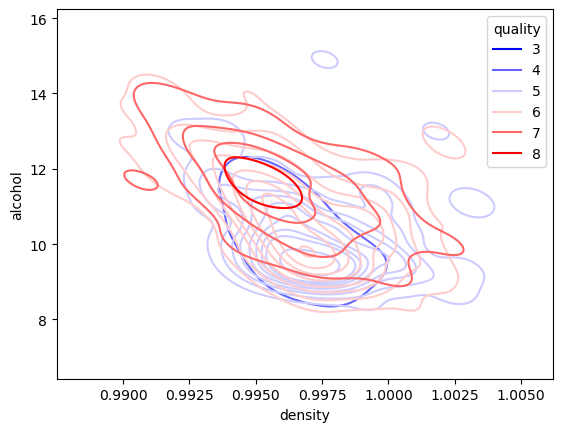

In [121]:
sns.kdeplot(data=df, x="density", y="alcohol", hue="quality",palette="bwr")

<Axes: xlabel='chlorides', ylabel='volatile acidity'>

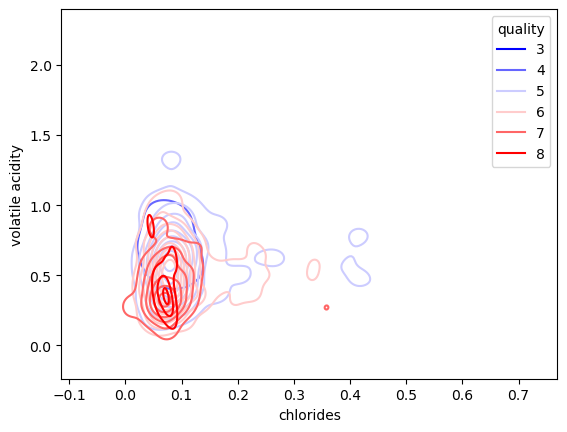

In [122]:
sns.kdeplot(data=df, x="chlorides", y="volatile acidity",hue="quality",palette="bwr")

In [123]:
df.loc[:, "chlorides_volatile_acid_effect"] = df["volatile acidity"]/df["chlorides"]
df.loc[:, "wine_flavor_metrics"] =  (df["sulphates"]*df["chlorides"]) * 100 / df["alcohol"]

<Axes: xlabel='sulphates', ylabel='chlorides_volatile_acid_effect'>

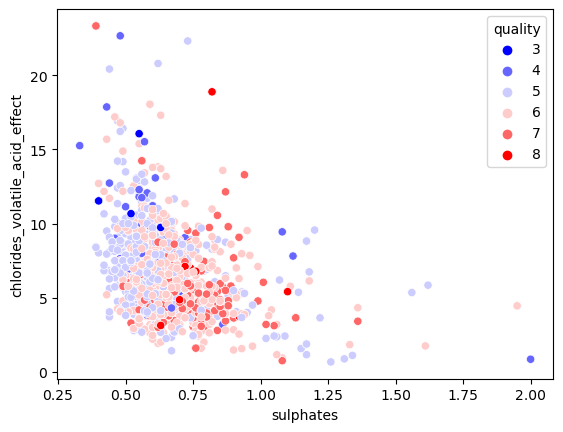

In [124]:
df.loc[:, "chlorides_volatile_acid_sulphates_effect"] = df["chlorides_volatile_acid_effect"] /df["sulphates"]

# sns.kdeplot(data=df, x="sulphates", y="chlorides_volatile_acid_effect",hue="quality",palette="bwr")
sns.scatterplot(data=df, x="sulphates", y="chlorides_volatile_acid_effect",hue="quality",palette="bwr")

<Axes: xlabel='wine_flavor_metrics', ylabel='Density'>

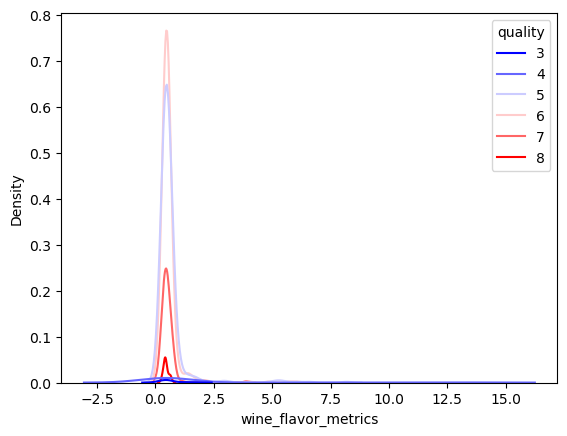

In [125]:
sns.kdeplot(data=df, x="wine_flavor_metrics",hue="quality",palette="bwr")

<Axes: xlabel='wine_flavor_metrics', ylabel='alcohol'>

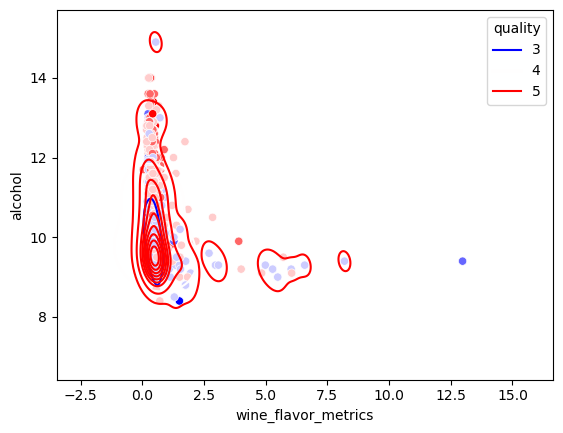

In [126]:
sns.scatterplot(data=df, x="wine_flavor_metrics", y="alcohol",hue="quality",palette="bwr")
sns.kdeplot(data=df.loc[df["quality"] < 6], x="wine_flavor_metrics", y="alcohol",hue="quality",palette="bwr")

<Axes: xlabel='alcohol', ylabel='alcohol'>

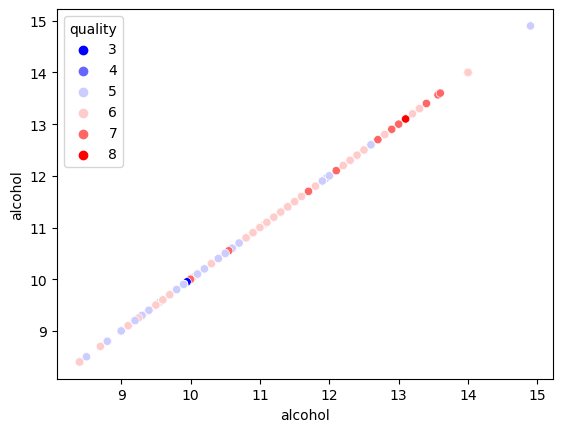

In [127]:
sns.scatterplot(data=df, x="alcohol", y="alcohol",hue="quality",palette="bwr")

[0.99557  0.99668  0.997845]


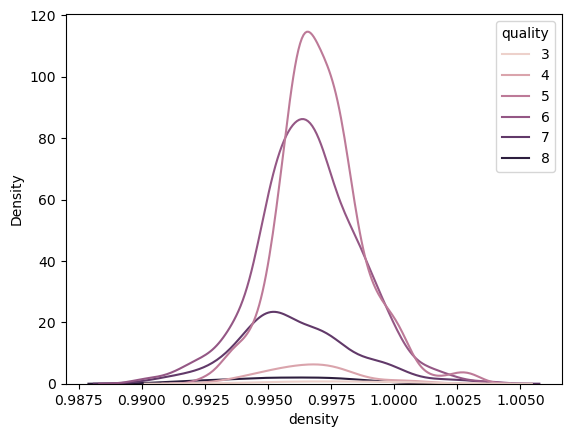

In [128]:
sns.kdeplot(data=df, x="density", hue="quality")

percentile = np.percentile(df["density"], [25, 50, 75])
print(percentile)